#Intro

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/FintechDemoDay/train.csv', sep=';')
df_test = pd.read_csv('/content/drive/MyDrive/FintechDemoDay/test.csv', sep=';')

In [4]:
def df_diff(df_A: pd.DataFrame, df_B: pd.DataFrame, on_A: str = "", on_B: str = "") -> pd.DataFrame:
    """
    Function: Compare DataFrame "A" and "B" to find rows only in "A" but not in "B"
    Input:
        df_A: DataFrame "A" ("left table")
        df_B: DataFrame "B" ("right table")
        on_A: column name in DataFrame "A" to compare on. If not provided/valid, will default to using df_A's index
        on_B: column name in DataFrame "B" to compare on. If not provided/valid, will default to using df_B's index
    
    Output:
        DataFrame containing diff result (all rows only in df_A but not in df_B, and same columns as df_A)
        If find zero rows, will return a DataFrame of 0 row and same columns as df_A (can be checked by `df_output.empty and df_output.shape[1] != 0`)
        If input is not valid DataFrame, will return a DataFrame of 0 row and 0 column (can be checked by `df_output.empty and df_output.shape[1] == 0`)
    
    Dependency: `import pandas as pd`
    History: 2022-02-07 Developed by frank-yifei-wang@GitHub
    """
    
    if type(df_A) != pd.core.frame.DataFrame or type(df_B) != pd.core.frame.DataFrame: 
        return pd.DataFrame()
    
    if on_A != "" and on_A in df_A.columns: 
        id_col_A = df_A[on_A]
    else:
        id_col_A = df_A.index
    if on_B != "" and on_B in df_B.columns: 
        id_col_B = df_B[on_B]
    else:
        id_col_B = df_B.index
    
    id_set_A = set(id_col_A)
    id_set_B = set(id_col_B)

    id_set_diff = id_set_A.difference(id_set_B)
    df_output = df_A[id_col_A.isin(id_set_diff)].copy()

    return df_output

In [8]:
df_train = df_diff(df_train,df_test)

#EDA

In [5]:
df_train.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
df_train.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40690 entries, 4521 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40690 non-null  int64 
 1   job        40690 non-null  object
 2   marital    40690 non-null  object
 3   education  40690 non-null  object
 4   default    40690 non-null  object
 5   balance    40690 non-null  int64 
 6   housing    40690 non-null  object
 7   loan       40690 non-null  object
 8   contact    40690 non-null  object
 9   day        40690 non-null  int64 
 10  month      40690 non-null  object
 11  duration   40690 non-null  int64 
 12  campaign   40690 non-null  int64 
 13  pdays      40690 non-null  int64 
 14  previous   40690 non-null  int64 
 15  poutcome   40690 non-null  object
 16  y          40690 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.6+ MB


##y data

In [11]:
df_train["y"].unique()

array(['no', 'yes'], dtype=object)

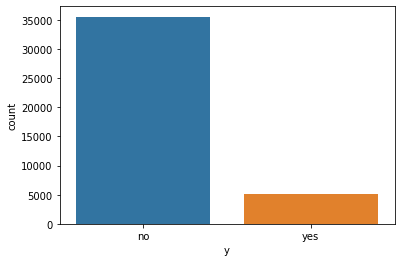

In [12]:
sns.countplot(x="y", data=df_train)

##Categorial data

###JOB

In [13]:
df_train["job"].unique()

array(['blue-collar', 'technician', 'management', 'admin.', 'services',
       'self-employed', 'housemaid', 'student', 'entrepreneur', 'retired',
       'unemployed', 'unknown'], dtype=object)

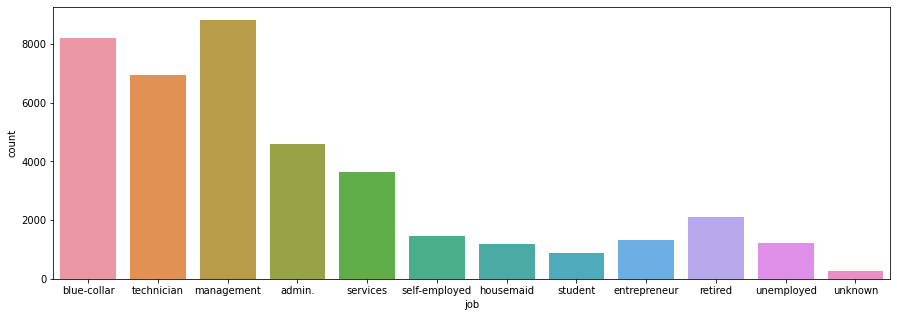

In [14]:
plt.subplots(figsize = (15,5))
sns.countplot(x="job", data=df_train)
plt.show()

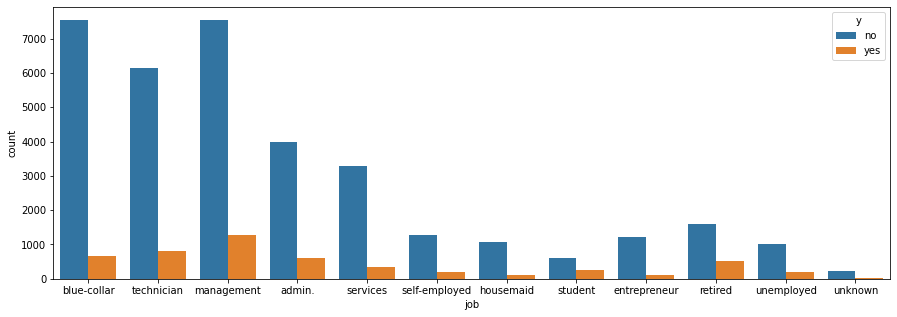

In [15]:
plt.subplots(figsize = (15,5))
sns.countplot(x="job",hue="y", data=df_train)
plt.show()

###Loan

In [40]:
df_train["loan"].unique()

array(['no', 'yes'], dtype=object)

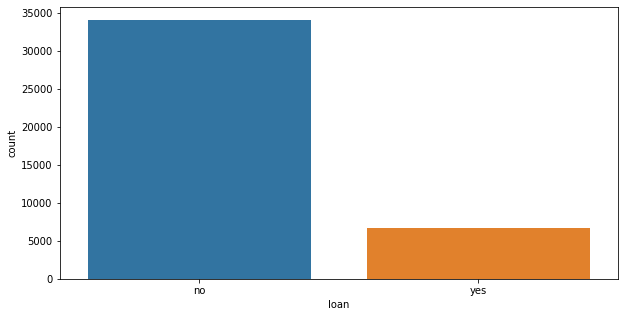

In [41]:
plt.subplots(figsize = (10,5))
sns.countplot(x="loan", data=df_train)
plt.show()

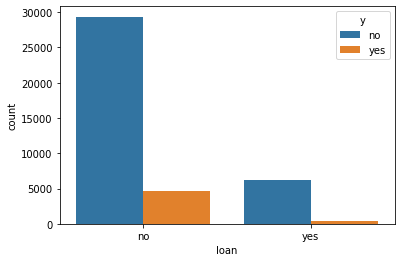

In [42]:
sns.countplot(x="loan",hue="y", data=df_train)

###POUTCOME

In [43]:
df_train["poutcome"].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

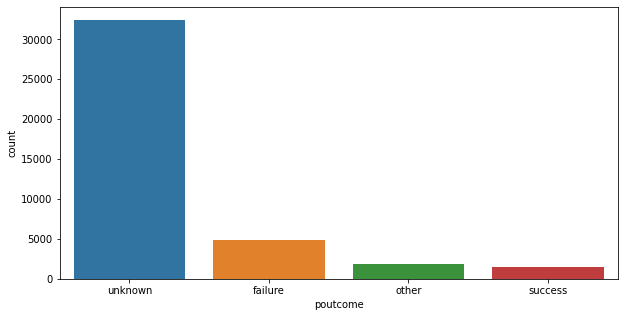

In [44]:
plt.subplots(figsize = (10,5))
sns.countplot(x="poutcome", data=df_train)
plt.show()

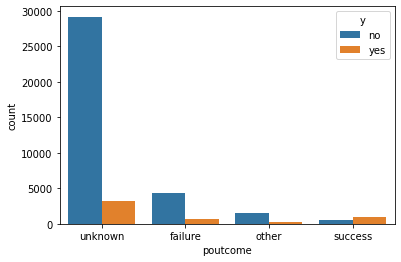

In [45]:
sns.countplot(x="poutcome",hue="y", data=df_train)

###CONTACT

In [46]:
df_train["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

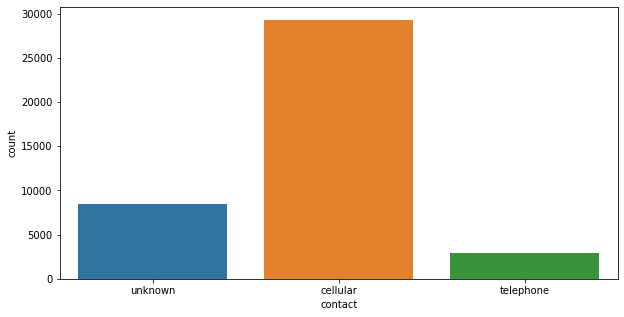

In [47]:
plt.subplots(figsize = (10,5))
sns.countplot(x="contact", data=df_train)
plt.show()

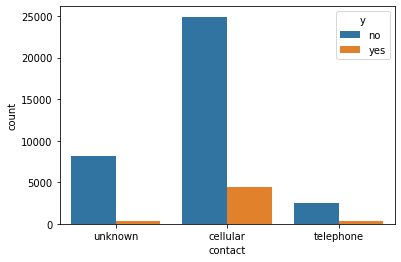

In [48]:
sns.countplot(x="contact",hue="y", data=df_train)

###Education

In [25]:
df_train["education"].unique()

array(['secondary', 'primary', 'tertiary', 'unknown'], dtype=object)

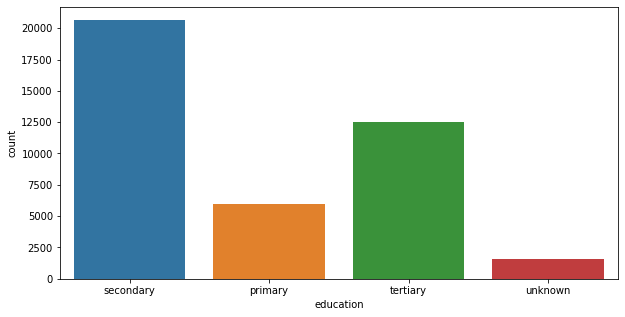

In [26]:
plt.subplots(figsize = (10,5))
sns.countplot(x="education", data=df_train)
plt.show()

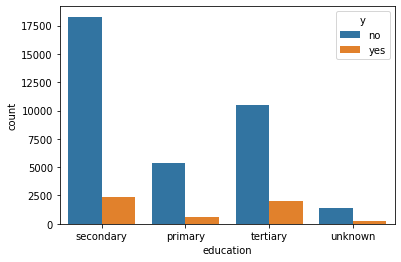

In [27]:
sns.countplot(x="education",hue="y", data=df_train)

###Marital

In [28]:
df_train["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

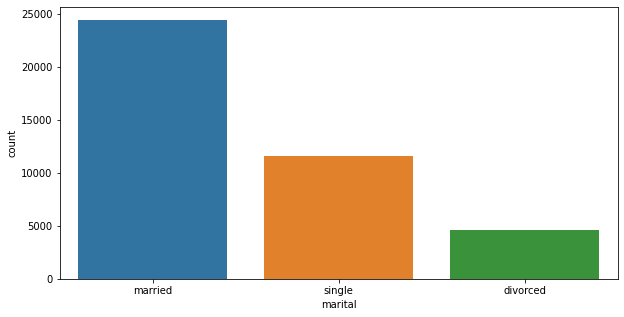

In [29]:
plt.subplots(figsize = (10,5))
sns.countplot(x="marital", data=df_train)
plt.show()

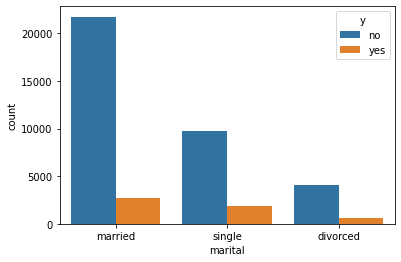

In [30]:
sns.countplot(x="marital",hue="y", data=df_train)

###Default

In [31]:
df_train["default"].unique()

array(['no', 'yes'], dtype=object)

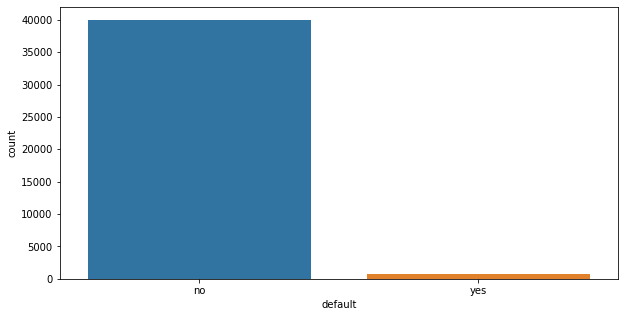

In [32]:
plt.subplots(figsize = (10,5))
sns.countplot(x="default", data=df_train)
plt.show()

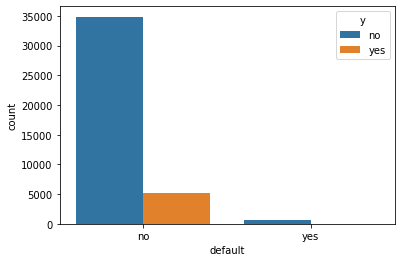

In [33]:
sns.countplot(x="default",hue="y", data=df_train)

###Housing

In [49]:
df_train["housing"].unique()


array(['no', 'yes'], dtype=object)

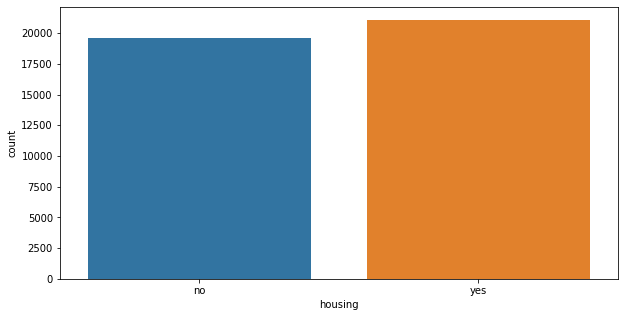

In [50]:
plt.subplots(figsize = (10,5))
sns.countplot(x="housing", data=df_train)
plt.show()

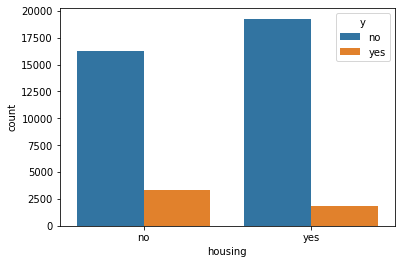

In [36]:
sns.countplot(x="housing",hue="y", data=df_train)

###Month

In [51]:
df_train["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

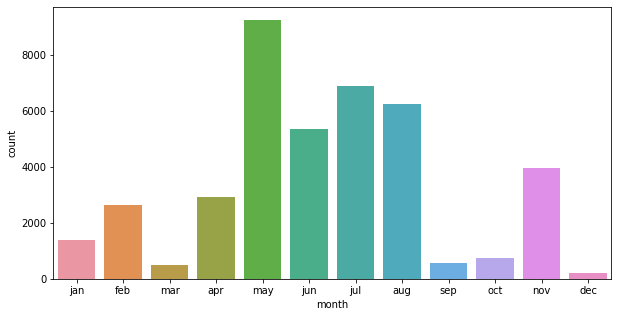

In [52]:
plt.subplots(figsize = (10,5))
sns.countplot(x="month", data=df_train, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])
plt.show()

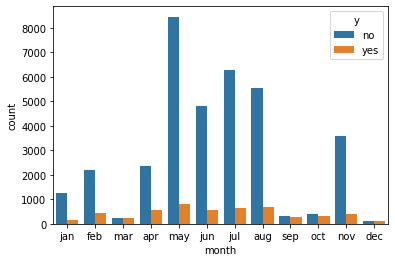

In [53]:
sns.countplot(x="month",hue="y", data=df_train, order=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"])

##Categorial to Int

In [54]:
from keras.utils import np_utils


def ubahcattoint(df):
  df['job'].replace(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'] , [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], inplace=True)
  df['month'].replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'] , [5, 6, 7, 8, 10, 11, 12, 1, 2, 3, 4, 9], inplace=True)
  #df['loan'].replace(['no', 'yes'],[1,2], inplace=True)


  #df['poutcome'].replace(['unknown', 'failure', 'other', 'success'],[1,2,3,4], inplace=True)
  
  #df['contact'].replace(['unknown', 'cellular', 'telephone'],[1,2,3], inplace=True)

  #df['education'].replace(['tertiary', 'secondary', 'unknown', 'primary'],[2,3,1,4], inplace=True)
  
  #df['marital'].replace(['married', 'single', 'divorced'],[1,2,3], inplace=True)

  #df['default'].replace(['no', 'yes'],[1,2], inplace=True)


  #df['housing'].replace(['yes', 'no'],[2,1], inplace=True)

  
  


##Integer

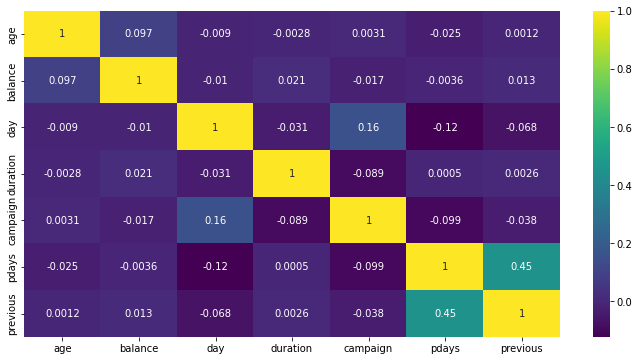

In [55]:
plt.figure(figsize=(12,6))
sns.heatmap(df_train.corr(), annot = True, cmap = 'viridis')
plt.show()

In [ ]:
#sns.pairplot(df_train, hue='y', size=2.5);

###Duration

In [56]:
df_train["duration"].describe()

count    40690.000000
mean       256.892209
std        257.421123
min          0.000000
25%        101.000000
50%        178.000000
75%        318.000000
max       4918.000000
Name: duration, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


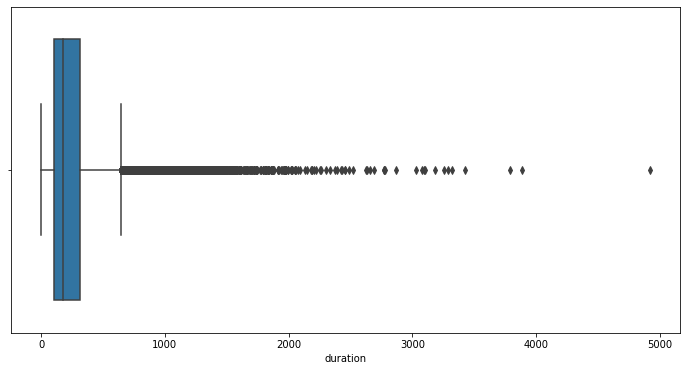

In [57]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'duration', data = df_train, orient="v")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


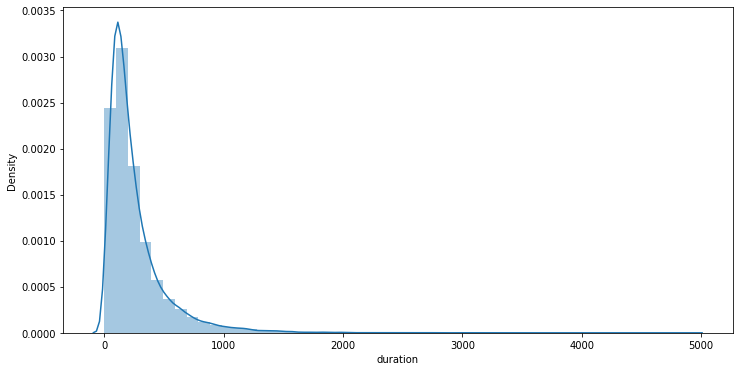

In [58]:
plt.figure(figsize=(12,6))
sns.distplot(df_train["duration"])
plt.show()

###Balance

In [59]:
df_train["balance"].describe()

count     40690.000000
mean       1413.368739
std        3102.941867
min       -8019.000000
25%          76.000000
50%         477.000000
75%        1506.000000
max      102127.000000
Name: balance, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


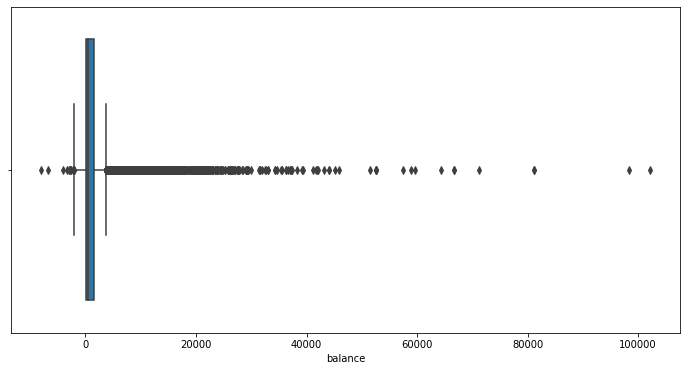

In [60]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'balance', data = df_train, orient="v")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


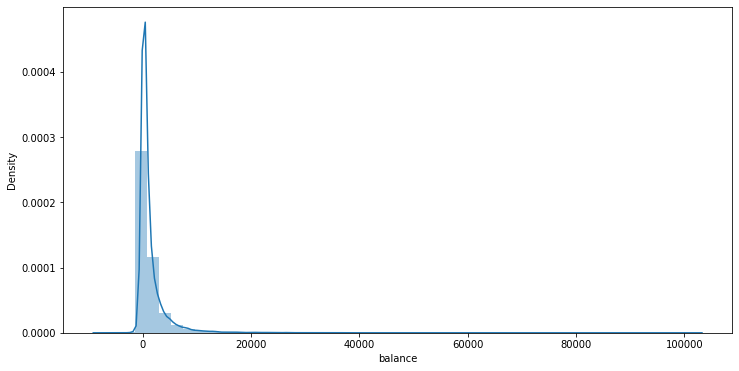

In [61]:
plt.figure(figsize=(12,6))
sns.distplot(df_train["balance"])
plt.show()

###Campaign

In [62]:
df_train["campaign"].describe()

count    40690.000000
mean         2.807889
std          3.133426
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         58.000000
Name: campaign, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


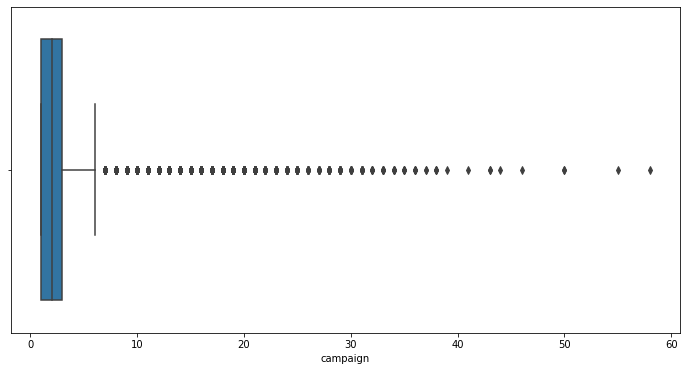

In [63]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'campaign', data = df_train, orient="v")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


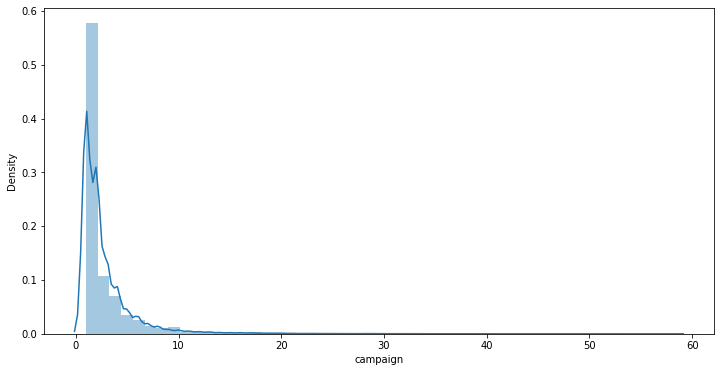

In [64]:
plt.figure(figsize=(12,6))
sns.distplot(df_train["campaign"])
plt.show()

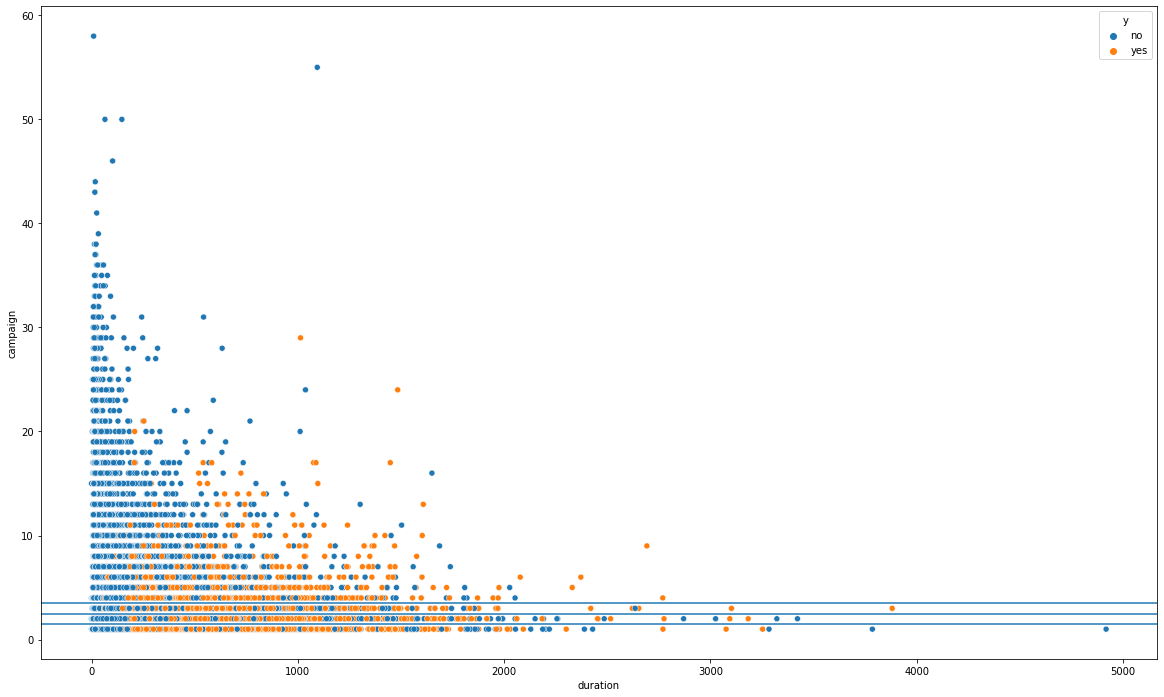

In [65]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='duration', y='campaign', data=df_train,
                hue='y')
plt.axhline(y=1.5)
plt.axhline(y=2.5)
plt.axhline(y=3.5)
plt.show()

###Age


In [66]:
df_train["age"].describe()

count    40690.000000
mean        40.942197
std         10.731577
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


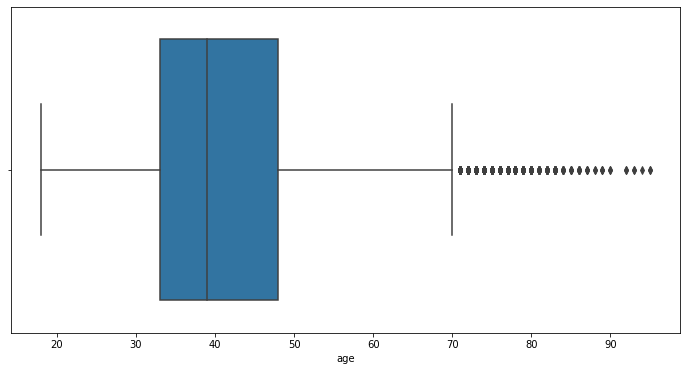

In [67]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'age', data = df_train, orient="v")
plt.show()

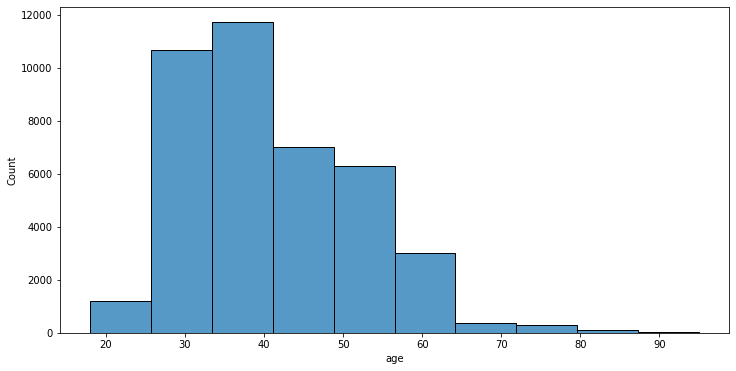

In [68]:
plt.figure(figsize=(12,6))
sns.histplot(data=df_train, x="age", bins=10)
plt.show()

In [69]:
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[(dataframe['age'] > 70) & (dataframe['age'] <= 98), 'age'] = 4

In [70]:
age(df_train)

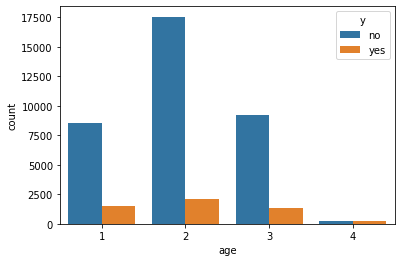

In [71]:
sns.countplot(x="age",hue="y", data=df_train)

###Day

In [72]:
df_train['day'].unique()

array([20, 21, 23, 26, 27, 28, 29, 30,  2,  3,  4,  5,  6,  9, 11, 12, 16,
       17, 18, 19, 24, 25,  1,  7,  8, 10, 14, 15, 22, 31, 13])

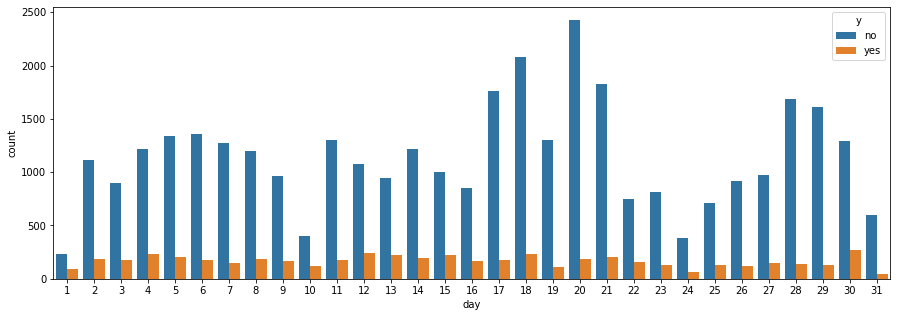

In [73]:
plt.subplots(figsize = (15,5))
sns.countplot(x="day",hue="y", data=df_train)
plt.show()

###pdays

In [74]:
df_train["pdays"].describe()

count    40690.000000
mean        44.775252
std        104.547606
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [75]:
df_train["pdays"][df_train["pdays"]==-1].count()

32433

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


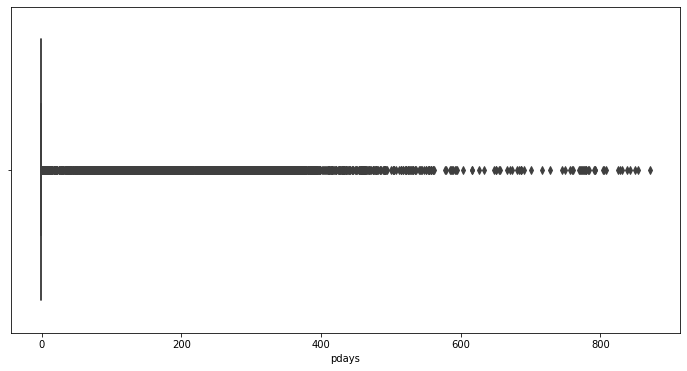

In [76]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'pdays', data = df_train, orient="v")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


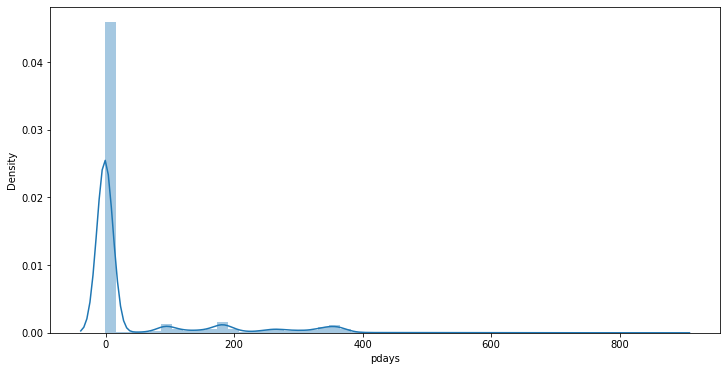

In [77]:
plt.figure(figsize=(12,6))
sns.distplot(df_train["pdays"])
plt.show()

In [78]:
df_train_pdaysneg = df_train[df_train['pdays']==-1]
df_train_pdaysneg

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4521,2,blue-collar,married,secondary,no,-152,no,no,unknown,20,may,100,1,-1,0,unknown,no
4522,2,technician,married,secondary,no,3763,yes,no,unknown,20,may,83,1,-1,0,unknown,no
4523,1,technician,single,secondary,no,1,yes,no,unknown,20,may,71,3,-1,0,unknown,no
4524,1,technician,married,secondary,no,4,no,no,unknown,20,may,199,4,-1,0,unknown,no
4525,3,blue-collar,divorced,primary,no,0,yes,yes,unknown,20,may,47,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,1,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,1,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,3,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,4,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [79]:
df_train_pdaysneg[df_train_pdaysneg['y']=='yes']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4607,2,technician,single,secondary,no,85,yes,no,unknown,20,may,1182,4,-1,0,unknown,yes
4634,1,admin.,single,secondary,no,431,yes,yes,unknown,20,may,1045,1,-1,0,unknown,yes
4640,2,technician,divorced,secondary,no,982,yes,no,unknown,20,may,650,3,-1,0,unknown,yes
4675,2,blue-collar,married,primary,no,408,yes,yes,unknown,20,may,1063,2,-1,0,unknown,yes
4682,2,technician,single,secondary,no,1022,yes,no,unknown,20,may,1410,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45202,2,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,yes
45203,1,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,1,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,3,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes


In [80]:
df_train_pdayspos = df_train[df_train['pdays']!=-1]
df_train_pdayspos

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,2,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,2,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,2,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,2,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,2,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,2,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,3,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,4,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,4,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [81]:
df_train_pdayspos["pdays"].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


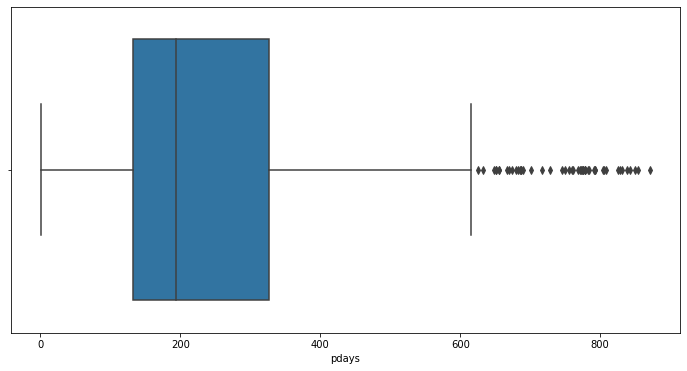

In [82]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'pdays', data = df_train_pdayspos, orient="v")
plt.show()

In [83]:
def pdays(dataframe):
    dataframe.loc[dataframe['pdays'] == -1, 'pdays'] = 1
    dataframe.loc[(dataframe['pdays'] >= 0) & (dataframe['pdays'] <= 133), 'pdays'] = 2
    dataframe.loc[(dataframe['pdays'] > 133) & (dataframe['pdays'] <= 194), 'pdays'] = 3
    dataframe.loc[(dataframe['pdays'] > 194) & (dataframe['pdays'] <= 327), 'pdays'] = 4
    dataframe.loc[dataframe['pdays'] > 327, 'pdays'] = 5
                   
pdays(df_train)

###Previous

In [84]:
df_train["previous"].describe()

count    40690.000000
mean         0.644802
std          2.419463
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

##Preprocessing Integer

In [85]:
def preprocesint(df):
  df['balance'] = df['balance'].agg(lambda x :(x-x.mean())/(x.std()))
  df['previous'] = df['previous'].agg(lambda x :(x-x.mean())/(x.std()))
  df['duration'] = df['duration'].agg(lambda x :(x-x.mean())/(x.std()))
  df['campaign'] = df['campaign'].agg(lambda x :(x-x.mean())/(x.std()))


#Train Data

In [86]:
df_train['balance'].std()

3102.941867212748

In [87]:
dftemp = pd.get_dummies(df_train, columns=['loan','poutcome','contact','education','marital','default','housing','pdays'], drop_first=True)

In [88]:
ubahcattoint(dftemp)
preprocesint(dftemp)

In [89]:
label = dftemp['y'].replace(['no', 'yes'],[0,1])
y = np_utils.to_categorical(label, 2)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [90]:
X = dftemp.drop(['y'], axis=1)
X

,age,job,balance,day,month,duration,campaign,previous,loan_yes,poutcome_other,...,education_secondary,education_tertiary,education_unknown,marital_married,marital_single,default_yes,housing_yes,pdays_3,pdays_4,pdays_5
4521,2,4,-0.504479,20,5,-0.609477,-0.576969,-0.266506,0,0,...,1,0,0,1,0,0,0,0,0,0
4522,2,2,0.757227,20,5,-0.675516,-0.576969,-0.266506,0,0,...,1,0,0,1,0,0,1,0,0,0
4523,1,2,-0.455171,20,5,-0.722133,0.061310,-0.266506,0,0,...,1,0,0,0,1,0,1,0,0,0
4524,1,2,-0.454204,20,5,-0.224893,0.380450,-0.266506,0,0,...,1,0,0,1,0,0,0,0,0,0
4525,3,4,-0.455493,20,5,-0.815365,-0.576969,-0.266506,1,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,3,2,-0.189616,17,11,2.797392,0.061310,-0.266506,0,0,...,0,1,0,1,0,0,0,0,0,0
45207,4,6,0.101720,17,11,0.773471,-0.257829,-0.266506,0,0,...,0,0,0,0,0,0,0,0,0,0
45208,4,6,1.386307,17,11,3.380095,0.699589,0.973438,0,0,...,1,0,0,1,0,0,0,1,0,0
45209,3,4,-0.240214,17,11,0.975475,0.380450,-0.266506,0,0,...,1,0,0,1,0,0,0,0,0,0


In [91]:
size=X.shape[1]
size

24

In [92]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=95, stratify=y)

In [112]:
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization


model = tf.keras.models.Sequential([
        tf.keras.Input(shape=(size,)),
        tf.keras.layers.Dense(64, activation='relu'),
        BatchNormalization(), 
        tf.keras.layers.Dense(128, activation='relu'),
        BatchNormalization(),                           
        tf.keras.layers.Dense(256, activation='relu'),
        BatchNormalization(), 
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)])
        # tf.keras.layers.Dense(2, activation='softmax')])

In [113]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                1600      
                                                                 
 batch_normalization_15 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_31 (Dense)            (None, 128)               8320      
                                                                 
 batch_normalization_16 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_32 (Dense)            (None, 256)               33024     
                                                                 
 batch_normalization_17 (Bat  (None, 256)             

In [114]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [115]:
from tensorflow.keras.callbacks import EarlyStopping

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('accuracy')>.96):
      self.model.stop_training=True

earlystop = EarlyStopping(monitor='val_loss',min_delta=0.0001, patience=2,restore_best_weights=True)

callback = [earlystop, myCallback()]

In [116]:
history = model.fit(X_train, y_train,
                   validation_data=(X_val, y_val),
                   epochs=100, batch_size=50, verbose=1, callbacks=callback)

print('History of the training',history.history)

Epoch 1/100
733/733 [==============================] - 5s 5ms/step - loss: 0.2762 - accuracy: 0.8818 - val_loss: 0.2442 - val_accuracy: 0.8842
Epoch 2/100
733/733 [==============================] - 4s 5ms/step - loss: 0.2473 - accuracy: 0.8918 - val_loss: 0.2373 - val_accuracy: 0.8965
Epoch 3/100
733/733 [==============================] - 4s 5ms/step - loss: 0.2428 - accuracy: 0.8931 - val_loss: 0.2322 - val_accuracy: 0.8946
Epoch 4/100
733/733 [==============================] - 4s 5ms/step - loss: 0.2368 - accuracy: 0.8944 - val_loss: 0.2337 - val_accuracy: 0.8956
Epoch 5/100
733/733 [==============================] - 4s 5ms/step - loss: 0.2341 - accuracy: 0.8948 - val_loss: 0.2295 - val_accuracy: 0.8921
Epoch 6/100
733/733 [==============================] - 4s 5ms/step - loss: 0.2327 - accuracy: 0.8939 - val_loss: 0.2258 - val_accuracy: 0.8946
Epoch 7/100
733/733 [==============================] - 4s 5ms/step - loss: 0.2287 - accuracy: 0.8971 - val_loss: 0.2299 - val_accuracy: 0.9002

In [119]:
y_predict=model.predict(X_val)
ypred=np.argmax(y_predict, axis=1)
ytes=np.argmax(y_val, axis=1)

In [120]:
y_predict

array([[0.4718528 , 0.54934204],
       [0.99545825, 0.00406753],
       [0.97415394, 0.0243543 ],
       ...,
       [0.507293  , 0.47076368],
       [0.99778134, 0.00305202],
       [0.9771638 , 0.02407969]], dtype=float32)

In [121]:
ypred[ypred==1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [122]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(ytes, ypred)

array([[3435,  119],
       [ 290,  225]])

In [123]:
print(classification_report(ytes, ypred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3554
           1       0.65      0.44      0.52       515

    accuracy                           0.90      4069
   macro avg       0.79      0.70      0.73      4069
weighted avg       0.89      0.90      0.89      4069



#Test data

In [124]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [125]:
age(df_test)
pdays(df_test)

In [126]:
dftestdum = pd.get_dummies(df_test, columns=['loan','poutcome','contact','education','marital','default','housing','pdays'], drop_first=True)

In [127]:
ubahcattoint(dftestdum)
preprocesint(dftestdum)

In [128]:
labels = dftestdum['y'].replace(['no', 'yes'],[0,1])
Y = np_utils.to_categorical(labels, 2)
Y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [129]:
Xtest = dftestdum.drop(['y'], axis=1)
Xtest

,age,job,balance,day,month,duration,campaign,previous,loan_yes,poutcome_other,...,education_secondary,education_tertiary,education_unknown,marital_married,marital_single,default_yes,housing_yes,pdays_3,pdays_4,pdays_5
0,1,10,0.121058,19,10,-0.711782,-0.576766,-0.320377,0,0,...,0,0,0,1,0,0,0,0,0,0
1,2,8,1.118521,11,5,-0.169175,-0.576766,2.041508,1,0,...,1,0,0,1,0,0,1,0,0,1
2,2,1,-0.024142,16,4,-0.303865,-0.576766,0.270094,0,0,...,0,1,0,0,1,0,1,0,0,1
3,1,1,0.017724,3,6,-0.249989,0.387925,-0.320377,1,0,...,0,1,0,1,0,0,1,0,0,0
4,3,4,-0.472701,5,5,-0.146086,-0.576766,-0.320377,0,0,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,2,8,-0.583345,30,7,0.250287,0.709488,-0.320377,0,0,...,1,0,0,1,0,0,1,0,0,0
4517,3,9,-1.573497,9,5,-0.427010,-0.576766,-0.320377,1,0,...,0,1,0,1,0,1,1,0,0,0
4518,3,2,-0.374682,19,8,-0.434706,2.638868,-0.320377,0,0,...,1,0,0,1,0,0,0,0,0,0
4519,1,4,-0.094914,6,2,-0.519368,0.387925,1.451037,0,1,...,1,0,0,1,0,0,0,0,1,0


In [130]:
Y_predict=model.predict(Xtest)
Ypred=np.argmax(Y_predict, axis=1)
Ytes=np.argmax(Y, axis=1)

In [131]:
Y_predict

array([[9.84372616e-01, 1.89693402e-02],
       [9.81010497e-01, 2.33619623e-02],
       [9.87486362e-01, 1.04044005e-02],
       ...,
       [9.99264777e-01, 7.59429124e-04],
       [9.64137316e-01, 3.00672166e-02],
       [8.68960798e-01, 1.38096735e-01]], dtype=float32)

In [132]:
confusion_matrix(Ytes, Ypred)

array([[3871,  129],
       [ 299,  222]])

In [133]:
print(classification_report(Ytes, Ypred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      4000
           1       0.63      0.43      0.51       521

    accuracy                           0.91      4521
   macro avg       0.78      0.70      0.73      4521
weighted avg       0.89      0.91      0.90      4521

